# Data Wrangling and EDA Work - "Credit Card Fraud Detection"

#### Objective: 

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##  Load and Initial Assessment of Data

In [2]:
cc_info = pd.read_csv('raw_data/cc_info.csv')
transactions = pd.read_csv('raw_data/transactions.csv')

In [3]:
print(cc_info.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dt

In [4]:
print(cc_info.head())
print(transactions.head())

        credit_card      city state  zipcode  credit_card_limit
0  1280981422329509    Dallas    PA    18612               6000
1  9737219864179988   Houston    PA    15342              16000
2  4749889059323202    Auburn    MA     1501              14000
3  9591503562024072   Orlando    WV    26412              18000
4  2095640259001271  New York    NY    10001              20000
        credit_card                 date  transaction_dollar_amount  \
0  1003715054175576  2015-09-11 00:32:40                      43.78   
1  1003715054175576  2015-10-24 22:23:08                     103.15   
2  1003715054175576  2015-10-26 18:19:36                      48.55   
3  1003715054175576  2015-10-22 19:41:10                     136.18   
4  1003715054175576  2015-10-26 20:08:22                      71.82   

        Long        Lat  
0 -80.174132  40.267370  
1 -80.194240  40.180114  
2 -80.211033  40.313004  
3 -80.174138  40.290895  
4 -80.238720  40.166719  


In [5]:
print(cc_info.isnull().sum())
print(transactions.isnull().sum())

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64
credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64


In [6]:
print(cc_info.duplicated().sum())
print(transactions.duplicated().sum())

0
0


In [7]:
print("Column names in cc_info:")
print(cc_info.columns)
print("\nColumn names in transactions:")
print(transactions.columns)

Column names in cc_info:
Index(['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit'], dtype='object')

Column names in transactions:
Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat'], dtype='object')


## Clean the Data

In [8]:
cc_info.dropna(subset=['credit_card'], inplace=True)
transactions.dropna(subset=['credit_card'], inplace=True)

In [9]:
cc_info = cc_info.drop_duplicates()
transactions = transactions.drop_duplicates()

In [10]:
transactions['date'] = pd.to_datetime(transactions['date'])

## Feature Engineering

In [11]:
transactions['day_of_week'] = transactions['date'].dt.day_name()
transactions['hour_of_day'] = transactions['date'].dt.hour

In [12]:
transactions.sort_values(by=['credit_card', 'date'], inplace=True)

In [13]:
transactions['transactions_last_hour'] = transactions.groupby('credit_card')\
    .rolling('1H', on='date')['transaction_dollar_amount'].count().reset_index(drop=True) - 1

In [14]:
print(transactions[['credit_card', 'date', 'transactions_last_hour']].head())

          credit_card                date  transactions_last_hour
38   1003715054175576 2015-07-31 20:03:05                     0.0
194  1003715054175576 2015-07-31 20:25:28                     0.0
107  1003715054175576 2015-07-31 23:09:32                     2.0
124  1003715054175576 2015-08-01 10:48:03                     0.0
137  1003715054175576 2015-08-01 17:43:43                     0.0


## Exploratory Data Analysis (EDA)

In [15]:
print(transactions.describe())

        credit_card  transaction_dollar_amount           Long            Lat  \
count  2.945880e+05              294588.000000  294588.000000  294588.000000   
mean   5.424562e+15                  86.008036     -76.235238      40.937669   
std    2.555803e+15                 124.655954      20.135015       5.391695   
min    1.003715e+15                   0.010000    -179.392887     -68.046553   
25%    3.344214e+15                  29.970000     -80.209708      40.487726   
50%    5.353426e+15                  58.470000     -73.199737      42.403066   
75%    7.646245e+15                 100.400000     -72.091933      43.180015   
max    9.999757e+15                 999.970000     179.917513      78.914330   

         hour_of_day  transactions_last_hour  
count  294588.000000           294588.000000  
mean       16.667909                0.492688  
std         7.152222                0.789689  
min         0.000000                0.000000  
25%        16.000000                0.000000

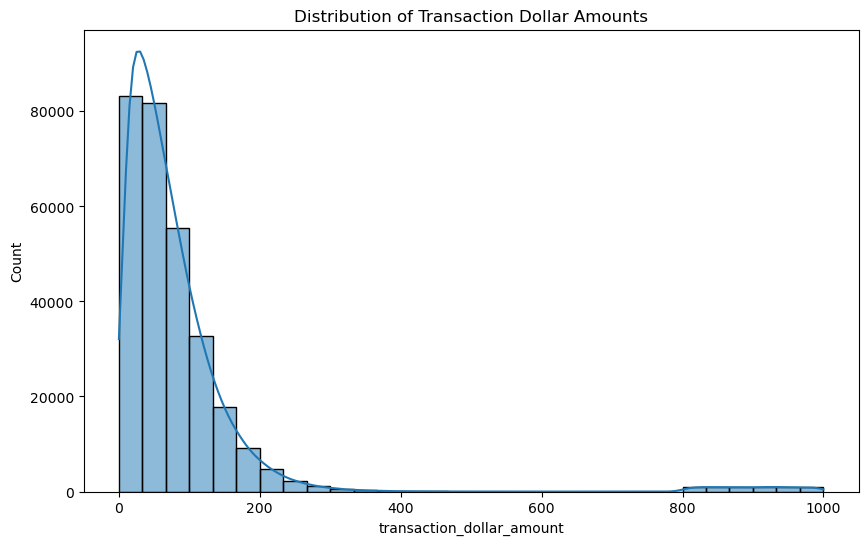

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions['transaction_dollar_amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Dollar Amounts')
plt.show()

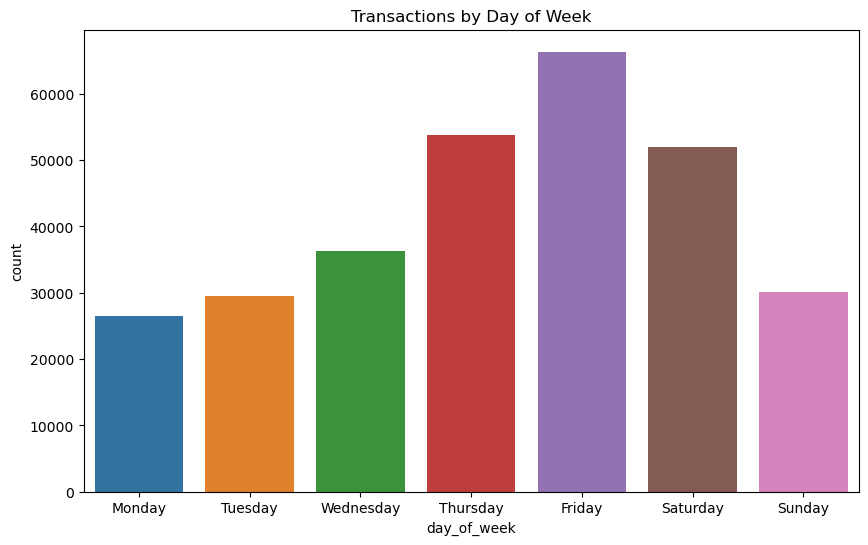

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=transactions, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transactions by Day of Week')
plt.show()

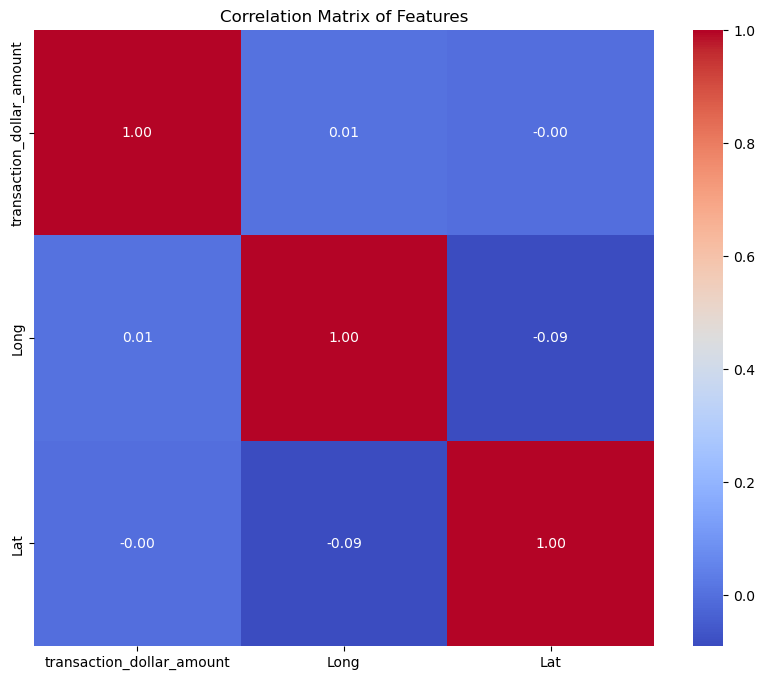

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(transactions[['transaction_dollar_amount', 'Long', 'Lat']].corr(numeric_only=True), 
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Cleaned Data

In [25]:
transactions.to_csv('data/cleaned_transactions.csv', index=False)
print("File saved successfully!")

File saved successfully!
